Yasmine Ben-Brahim
>Python Portfolio 
>> Skills covered in Part 1 consist of:
- Analyze data using python
- Filter and grouping data
- Create a function for quick metadata output
- Join DataFrames
- Create calculated columns

>>Skills covered in Part 2 consist of:
- Collect and store live stock data using python
- Create calculated columns after analyzing, filtering, and grouping data
- Data visualization

PART 1

In [1]:
#Importing pandas
import os, pandas as pd
path = os.getcwd()

#Reading in data 
bls08 = pd.read_excel(path+'\\BLS2008.xlsx')
bls09 = pd.read_excel(path+'\\BLS2009.xlsx')
bls10 = pd.read_excel(path+'\\BLS2010.xlsx')
bls11 = pd.read_excel(path+'\\BLS2011.xlsx')

bls08['year'] = 2008
bls09['year'] = 2009
bls10['year'] = 2010
bls11['year'] = 2011

#Cleaning data
bls10.columns = map(str.lower, bls10.columns)

bls11.columns = map(str.lower, bls11.columns)
bls11.head(1)

bls08.mean_prse.replace('*', None, inplace=True)
bls08.astype({'mean_prse': 'float64'}).dtypes

#Joining tables and cleaning data set
bls4yr = pd.concat([bls08, bls09, bls10, bls11],
                 keys =['2008','2009','2010','2011'],
                 names = ['year','rowid_year'])

bls4yr['occ_title']= bls4yr['occ_title'].str.lower()

bls4yr['occ_title'] = bls4yr['occ_title'].replace({'community and social services occupations':'community and social service occupations',
                             'healthcare practitioners and technical occupations':'healthcare practitioner and technical occupations',
                             'computer and mathematical science occupations':'computer and mathematical occupations'
                            })

In [12]:
#Function, dfinfo() that will show the shape, datatypes, and first 5 rows of the DataFrame when you call it
#and pass a DataFrame to it

def dfinfo(df):
    print(f'Dataframe shape: {df.shape}')
    print( '\n')
    print(f'Dataframe datatypes: \n{df.dtypes}')
    print( '\n')
    return df.head(5)
dfinfo(bls4yr)

Dataframe shape: (3284, 21)


Dataframe datatypes: 
occ_code      object
occ_title     object
group         object
tot_emp        int64
emp_prse     float64
h_mean        object
a_mean        object
mean_prse     object
h_pct10       object
h_pct25       object
h_median      object
h_pct75       object
h_pct90       object
a_pct10       object
a_pct25       object
a_median      object
a_pct75       object
a_pct90       object
annual        object
hourly        object
year           int64
dtype: object




occ_code                        occ_title  group    tot_emp  \
year rowid_year                                                               
2008 0           00-0000                  all occupations  total  135185230   
     1           11-0000           management occupations  major    6152650   
     2           11-1011                 chief executives    NaN     301930   
     3           11-1021  general and operations managers    NaN    1697690   
     4           11-1031                      legislators    NaN      64650   

                 emp_prse h_mean  a_mean mean_prse h_pct10 h_pct25  ...  \
year rowid_year                                                     ...   
2008 0                0.1  20.32   42270       0.1    8.02   10.38  ...   
     1                0.2  48.23  100310       0.2    20.4   29.09  ...   
     2                0.7  77.13  160440       0.5   33.02   49.08  ...   
     3                0.3  51.91  107970       0.2   21.83   30.24  ...   
     4                1.2      *   37980       1.1       *       *  ...   

                h_pct75 h_pct90 a_pct10 a_pct25 a_median a_pct75 a_pct90  \
year rowid_year                                                            
2008 0            24.78   37.99   16680   21590    32390   51540   79020   
     1            60.74       #   42440   60500    87670  126330       #   
     2                #       #   68680  102080   158560       #       #   
     3            65.87       #   45410   62900    91570  137020       #   
     4                *       *   14080   15350    16920   51120   81170   

                annual hourly  year  
year rowid_year                      
2008 0             NaN    NaN  2008  
     1             NaN    NaN  2008  
     2             NaN    NaN  2008  
     3             NaN    NaN  2008  
     4            True    NaN  2008  

[5 rows x 21 columns]

In [15]:
#Example of a business analytics question:

'''For jobs that had total employment between 500,000 and 1,000,000 in 2011, which job category had a
percentage growth in employment from 2010 to 2011 equal to 2.6%? Type (or copy and paste) the Occupation Code 
exactly as it shows in the spreadsheet.'''

yr10 = bls4yr[['occ_title','occ_code','tot_emp','year']].loc[bls4yr.year==2010]
yr11 = bls4yr[['occ_title','occ_code','tot_emp','year']].loc[bls4yr.year==2011]

yr10.set_index('occ_code', inplace=True)
yr11.set_index('occ_code', inplace=True)

totEmp10 = yr10.loc[yr10.tot_emp>=500000].loc[yr10.tot_emp<=1000000]
totEmp11 = yr11.loc[yr11.tot_emp>=500000].loc[yr11.tot_emp<=1000000]

pct_chg = round((((totEmp11.tot_emp / totEmp10.tot_emp)-1)*100),2)
pct_chg

occ_code
13-1111     0.49
13-1199    -2.69
15-1132      NaN
15-1150     9.19
23-0000      NaN
23-1011     1.71
25-2022    -1.87
25-3999    16.55
29-2061    -0.16
31-1011    -5.92
31-9092     3.05
33-3051    -1.22
35-1012     1.83
35-2011    -4.36
35-2014     5.08
35-2021    -3.43
35-3011      NaN
35-9021    -0.33
37-2012     1.39
37-3011    -0.92
39-9011     3.27
39-9021    19.62
41-3099    12.24
43-3071    -2.19
43-4171    -2.33
43-5071     0.01
43-6011      NaN
43-6013      NaN
47-2031    -6.69
47-2061     0.21
47-2111    -0.48
49-3023     0.38
51-1011     0.74
51-2092     2.60
53-3033    -1.16
53-7051    -2.91
53-7064    -1.48
Name: tot_emp, dtype: float64

>Answer: 51-2092 
>>Occuption code '51-2092' had a percentage growth in employment from 2010 to 2011 equal to 2.6% for jobs that had total employment between 500,000 and 1,000,000 in 2011

PART 2

>Using pandas_datareader and yahoo finance as source of data. Looking at following companies (stock symbol in parentheses). 
- Microsoft (MSFT)
- Boeing (BA)
- Royal Caribbean Cruises (RCL)
- Southwest Airlines (LUV)
- Wells Fargo (WFC)
- Tesla (TSLA)
- Date range of stock data to analyze

>Time Frame
- Start Date: 4/22/2015
- End Date: 4/22/2020

In [4]:
import datetime
import pandas_datareader as pdr

#defining timeframe and company variables
start = datetime.datetime(2015,4,22)
end = datetime.datetime(2020,4,22)

microsoft = round(pdr.DataReader('MSFT','yahoo',start, end),2)
boeing = round(pdr.DataReader('BA','yahoo',start, end),2)
rcc = round(pdr.DataReader('RCL','yahoo',start, end),2)
sw = round(pdr.DataReader('LUV','yahoo',start, end),2)
wf = round(pdr.DataReader('WFC','yahoo',start, end),2)
tesla = round(pdr.DataReader('TSLA','yahoo',start, end),2)

In [7]:
#Looking at the descriptive analytics of a company

wf.describe().round(2)

,High,Low,Open,Close,Volume,Adj Close
count,1260.00,1260.00,1260.00,1260.00,1.260000e+03,1260.00
mean,52.15,51.25,51.70,51.70,2.094294e+07,46.63
std,5.59,5.73,5.64,5.66,1.034190e+07,4.91
min,26.87,25.11,26.26,25.25,4.635500e+06,24.75
25%,48.84,48.02,48.42,48.41,1.493142e+07,43.83
50%,53.00,52.04,52.56,52.54,1.805520e+07,47.00
75%,55.68,54.88,55.30,55.26,2.331415e+07,49.40
max,66.31,65.66,65.89,65.93,1.033944e+08,59.72


In [8]:
#Looking at the descriptive analytics of a company on a specific date

tesla.loc['11-30-2018']

High             351.60
Low              338.26
Open             341.83
Close            350.48
Volume       5629100.00
Adj Close        350.48
Name: 2018-11-30 00:00:00, dtype: float64

In [9]:
#Creating a column for "Market Cap"

sw['Market Cap'] = round(sw.Volume*sw.Close,2)
sw.tail(10)

,High,Low,Open,Close,Volume,Adj Close,Market Cap
Date,,,,,,,
2020-04-08,34.78,32.63,33.56,34.30,8923800.0,34.30,306086340.0
2020-04-09,37.31,35.13,36.30,36.47,10383700.0,36.47,378693539.0
2020-04-13,36.72,33.75,36.72,34.26,9067500.0,34.26,310652550.0
2020-04-14,36.05,34.71,35.17,34.78,8860200.0,34.78,308157756.0
2020-04-15,35.26,32.52,35.15,32.82,20028700.0,32.82,657341934.0
2020-04-16,32.35,30.20,32.12,30.68,17862300.0,30.68,548015364.0
2020-04-17,32.95,30.90,32.50,31.19,20139900.0,31.19,628163481.0
2020-04-20,31.48,29.51,30.64,31.06,14553900.0,31.06,452044134.0
2020-04-21,31.23,29.60,30.05,30.11,12562700.0,30.11,378262897.0


Data Visualization: Using pandas_datareader and yahoo finance to pull data for:
- VTI, this is an ETF for the total us stock market
- BND, an ETF for the total US bond market
- VEU, an ETF for the total world stock market minus the US
- BNDX, an ETF for the total world bond market minus the US

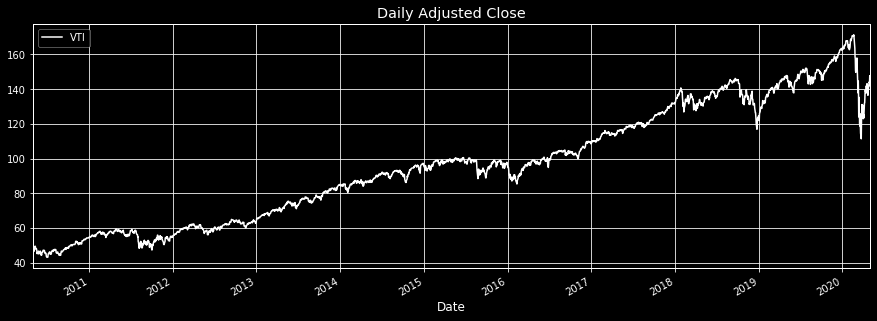

In [11]:
# Importing additional modules that allow me to plot graphs

%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib import style # style lets me customize charts

import matplotlib as mpl


# defining timeframe and ETF variables

start = datetime.datetime(2010,5,1)
end = datetime.datetime(2020,5,1)

vti = round(pdr.DataReader('VTI','yahoo',start, end),2)
bnd = round(pdr.DataReader('BND','yahoo',start, end),2)
veu = round(pdr.DataReader('VEU','yahoo',start, end),2)
bndx = round(pdr.DataReader('BNDX','yahoo',start, end),2)

# Creating Adjusted Close series

vtiClose = vti['Adj Close']
bndClose = bnd['Adj Close']
veuClose = veu['Adj Close']
bndxClose = bndx['Adj Close']

# line plot showing the adjusted closing price for a specific ETF

style.use('ggplot')

plt.style.use(['dark_background'])

mpl.rc('figure', figsize=(15,5))

mpl.rc('lines', linewidth = 1.5)

vtiClose.plot(title='Daily Adjusted Close', label='VTI', color='w')

plt.legend()